3D Model for Numbers Data
Anna Shang
2018.3

In [15]:
from representations import mds, plot_dendrogram
import csv
import numpy as np
%pylab inline
import pandas as pd
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


/Users/anna/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
sim_data = pd.read_csv('/Users/anna/Downloads/Extension_1.18.18_deidentified.csv', encoding = 'ISO-8859-2')
sim_data = sim_data[2:]

# eliminations due to technical difficulties
sim_data = sim_data[sim_data.random.astype(int) != 5089]
sim_data = sim_data[sim_data.random.astype(int) != 9502] # problems with explicit math survey only
sim_data = sim_data[sim_data.random.astype(int) != 6531] # problems with explicit math survey only



# attention check failing: __ people eliminated
sim_data = sim_data[sim_data.attcheck1_1.astype(int) > 90] # How similar do you believe 3 and 3 are?
sim_data = sim_data[sim_data.attcheck3_1.astype(int) > 90] # How similar do you believe 20 and 20 are?
sim_data = sim_data[sim_data.attcheck5_1.astype(int) > 90] # How similar do you believe 11 and 11 are?
sim_data = sim_data[sim_data.attcheck7_1.astype(int) > 90] # How similar do you believe 18 and 18 are?
sim_data = sim_data[sim_data.attcheck9_1.astype(int) > 90] # How similar do you believe 7 and 7 are?

sim_data

,StartDate,EndDate,Duration (in seconds),consent,mostSimilar,leastSimilar,1_sim1_1,2_sim1_1,3_sim1_1,4_sim1_1,...,SC8,SC9,SC10,SC11,SC12,SC13,SC14,SC15,workerId,random
2,12/27/17 10:18,12/27/17 10:58,2414,I consent to participate in this study.,"21,12","5,29",35,75,43,34,...,5,0,0,0,0,7,0,0,NaN,1815
3,12/27/17 10:56,12/27/17 11:22,1545,I consent to participate in this study.,"16,4","20,7",31,62,30,60,...,0,0,0,0,0,0,0,0,NaN,8505
5,12/27/17 10:42,12/27/17 11:31,2984,I consent to participate in this study.,"20,10","7,25",29,83,15,24,...,0,0,0,0,0,2,0,0,NaN,8311
6,12/27/17 10:48,12/27/17 12:08,4755,I consent to participate in this study.,"5,6","29,4",27,78,47,62,...,0,0,0,0,0,1,0,0,NaN,7845
7,12/27/17 12:23,12/27/17 12:49,1547,I consent to participate in this study.,"16,6","11,7",5,83,17,10,...,0,0,0,0,0,0,0,0,NaN,2364
8,12/27/17 13:46,12/27/17 14:10,1463,I consent to participate in this study.,"5,10","4,27",35,59,52,29,...,3,0,0,0,0,4,0,0,NaN,4588
9,12/27/17 14:44,12/27/17 15:26,2525,I consent to participate in this study.,"7,13","29,4",0,95,15,55,...,2,0,0,0,0,5,0,0,NaN,5344
10,12/27/17 14:16,12/27/17 15:27,4310,I consent to participate in this study.,"20,10","14,29",1,31,3,32,...,0,0,0,0,0,0,0,0,NaN,6336
11,12/27/17 22:14,12/27/17 22:43,1741,I consent to participate in this study.,"20,10","9,13",20,60,60,45,...,0,0,0,0,0,0,0,0,NaN,3196
12,1/18/18 9:56,1/18/18 10:09,762,I consent to participate in this study.,"20,25","5,17",49,60,41,50,...,0,1,0,0,0,0,0,0,NaN,4734


In [17]:
sim_data = sim_data.iloc[:, 6:205]
sim_data.head()

att = ['attcheck1_1', 'attcheck2_1', 'attcheck3_1', 'attcheck4_1', 'attcheck5_1', 
       'attcheck6_1', 'attcheck7_1', 'attcheck8_1', 'attcheck9_1']
sim_data = sim_data.drop(att, 1)

sim_data.columns = sim_data.columns.str.replace('_1', '')
sim_data.columns = sim_data.columns.str.replace('sim', '')

sim_map = {'1': '1/2', '11': '1/16', '2': '1/3', '12': '1/17', '1': '1/2', '3': '1/4', 
         '13': '1/18', '4': '1/5', '14': '1/19', '5': '1/6', '15':'1/20', '6':'1/11', 
         '16': '11/12', '7': '1/12', '17': '11/13', '8': '1/13', '18': '11/14', 
          '9': '1/14', '19': '11/15', '10':'1/15', '20': '11/16'}

sim_data.head()

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,6_10,7_10,8_10,9_10,10_10,1_20,2_20,3_20,4_20,5_20
2,35,75,43,34,29,29,28,64,48,37,...,80,12,18,40,21,62,34,82,40,31
3,31,62,30,60,22,27,21,54,31,24,...,42,17,35,37,31,13,8,25,10,28
5,29,83,15,24,17,35,23,68,31,19,...,78,56,81,27,21,76,16,65,57,38
6,27,78,47,62,19,65,42,54,70,20,...,76,46,86,38,73,85,50,33,69,32
7,5,83,17,10,32,47,10,87,22,5,...,75,8,63,65,29,48,15,85,15,56


In [18]:
field1 = np.zeros((10,10))
a = [21, 5, 14, 16, 9, 29, 8, 11, 20, 18]
for j in range(10):
    a.append(a[0])
    a.remove(a[0])
    for i in range(10):
        field1[i][j] = a[i]

field2 = np.zeros((10,10))
b = [10, 7, 25, 12, 17, 28, 6, 13, 4, 27]
for j in range(10):
    b.append(b[0])
    b.remove(b[0])
    for i in range(10):
        field2[i][j] = b[i]
        
field = np.zeros((10,20))

for n in range(10):
    field[n] = np.concatenate((field1[n],field2[n]), axis = 0)
df = pd.DataFrame(field)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5.0,14.0,16.0,9.0,29.0,8.0,11.0,20.0,18.0,21.0,7.0,25.0,12.0,17.0,28.0,6.0,13.0,4.0,27.0,10.0
1,14.0,16.0,9.0,29.0,8.0,11.0,20.0,18.0,21.0,5.0,25.0,12.0,17.0,28.0,6.0,13.0,4.0,27.0,10.0,7.0
2,16.0,9.0,29.0,8.0,11.0,20.0,18.0,21.0,5.0,14.0,12.0,17.0,28.0,6.0,13.0,4.0,27.0,10.0,7.0,25.0
3,9.0,29.0,8.0,11.0,20.0,18.0,21.0,5.0,14.0,16.0,17.0,28.0,6.0,13.0,4.0,27.0,10.0,7.0,25.0,12.0
4,29.0,8.0,11.0,20.0,18.0,21.0,5.0,14.0,16.0,9.0,28.0,6.0,13.0,4.0,27.0,10.0,7.0,25.0,12.0,17.0
5,8.0,11.0,20.0,18.0,21.0,5.0,14.0,16.0,9.0,29.0,6.0,13.0,4.0,27.0,10.0,7.0,25.0,12.0,17.0,28.0
6,11.0,20.0,18.0,21.0,5.0,14.0,16.0,9.0,29.0,8.0,13.0,4.0,27.0,10.0,7.0,25.0,12.0,17.0,28.0,6.0
7,20.0,18.0,21.0,5.0,14.0,16.0,9.0,29.0,8.0,11.0,4.0,27.0,10.0,7.0,25.0,12.0,17.0,28.0,6.0,13.0
8,18.0,21.0,5.0,14.0,16.0,9.0,29.0,8.0,11.0,20.0,27.0,10.0,7.0,25.0,12.0,17.0,28.0,6.0,13.0,4.0
9,21.0,5.0,14.0,16.0,9.0,29.0,8.0,11.0,20.0,18.0,10.0,7.0,25.0,12.0,17.0,28.0,6.0,13.0,4.0,27.0


In [19]:
fieldmap1 = {5: 0, 14: 1, 16: 2, 9:3, 29:4, 8:5, 11:6, 20: 7, 18:8, 21:9}
fieldmap2 = {7: 0, 25: 1, 12: 2, 17:3, 28:4, 6:5, 13:6, 4: 7, 27:8, 10:9}

In [20]:
matrix1 = np.zeros((84, 10, 10))
sim = sim_data.values
#i: row index of sim_data
#j: column index of sim_data
for i in range(84):
    for j in range(190):
        #s: column name in excel, format: "a_b"
        s = sim_data.columns[j] 
        #a: row of field + 1
        #b: key of sim_map
        a,b = (int(x) for x in s.split('_'))
        #n: first column in field
        #m: second column in field
        n, m = (int(x) for x in sim_map[str(b)].split('/'))
        if (int(field[a-1][n-1]) in fieldmap1.keys()) & (int(field[a-1][m-1]) in fieldmap1.keys()):
                #x: row index of matrix
                x = fieldmap1[field[a-1][n-1]] 
                #y: column index of matrix
                y = fieldmap1[field[a-1][m-1]]
                matrix1[i][x][y] = sim[i][j]
                matrix1[i][y][x] = sim[i][j]

matrix2 = np.zeros((84, 10, 10))
#i: row index of sim_data
#j: column index of sim_data
for i in range(84):
    for j in range(190):
        #s: column name in excel, format: "a_b"
        s = sim_data.columns[j] 
        #a: row of field + 1
        #b: key of sim_map
        a,b = (int(x) for x in s.split('_'))
        #n: first column in field
        #m: second column in field
        n, m = (int(x) for x in sim_map[str(b)].split('/'))
        if (int(field[a-1][n-1]) in fieldmap2.keys()) & (int(field[a-1][m-1]) in fieldmap2.keys()):
                #x: row index of matrix
                x = fieldmap2[field[a-1][n-1]] 
                #y: column index of matrix
                y = fieldmap2[field[a-1][m-1]]
                matrix2[i][x][y] = sim[i][j]
                matrix2[i][y][x] = sim[i][j]

In [21]:
print("Column names & Row names:")
print(list(fieldmap1.keys()))
print("\n" + "0 layer of the 3D Similarity Matrix:")
matrix1[0]
matrix2[0]

Column names & Row names:
[5, 14, 16, 9, 29, 8, 11, 20, 18, 21]

0 layer of the 3D Similarity Matrix:


array([[  0.,  14.,  26.,  39.,  83.,  62.,  16.,  11.,  16.,  10.],
       [ 14.,   0.,  22.,  25.,  52.,   8.,  34.,  23.,  43.,  19.],
       [ 26.,  22.,   0.,  19.,  32.,  74.,  52.,  82.,  20.,  71.],
       [ 39.,  25.,  19.,   0.,  16.,  23.,  20.,  21.,  40.,  19.],
       [ 83.,  52.,  32.,  16.,   0.,  21.,  20.,  91.,  53.,  31.],
       [ 62.,   8.,  74.,  23.,  21.,   0.,  12.,  54.,  13.,  34.],
       [ 16.,  34.,  52.,  20.,  20.,  12.,   0.,  23.,  20.,  23.],
       [ 11.,  23.,  82.,  21.,  91.,  54.,  23.,   0.,  13.,  10.],
       [ 16.,  43.,  20.,  40.,  53.,  13.,  20.,  13.,   0.,  13.],
       [ 10.,  19.,  71.,  19.,  31.,  34.,  23.,  10.,  13.,   0.]])

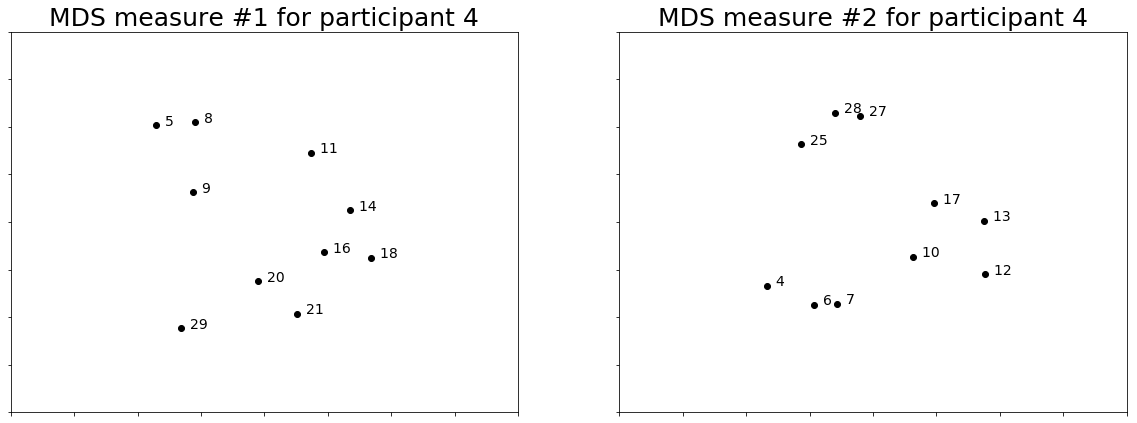

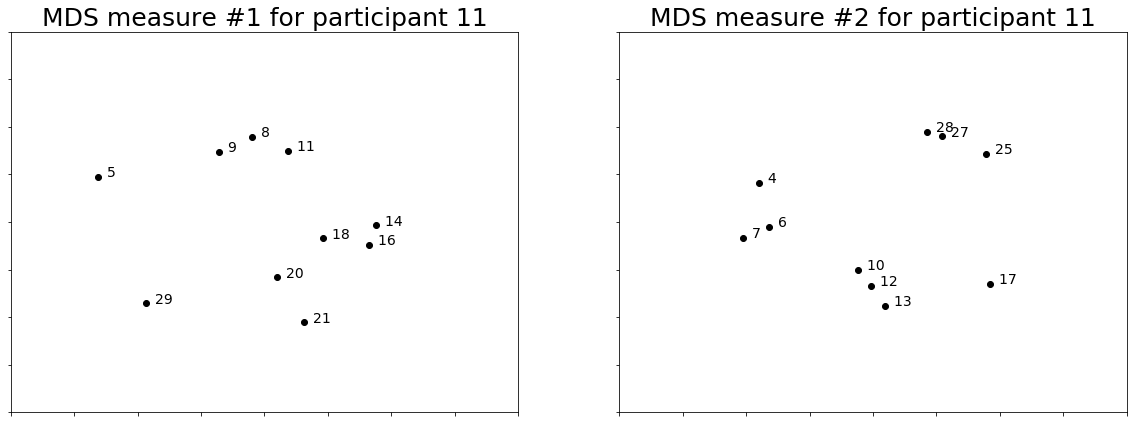

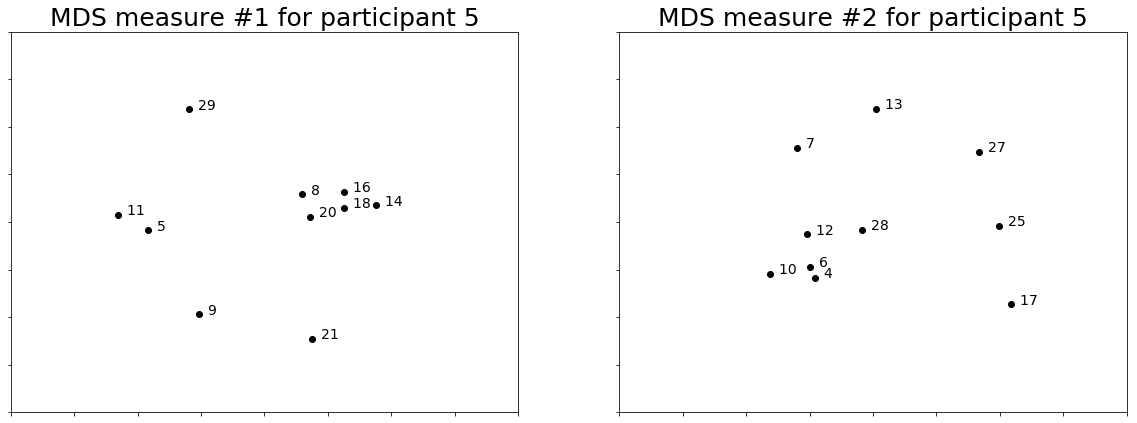

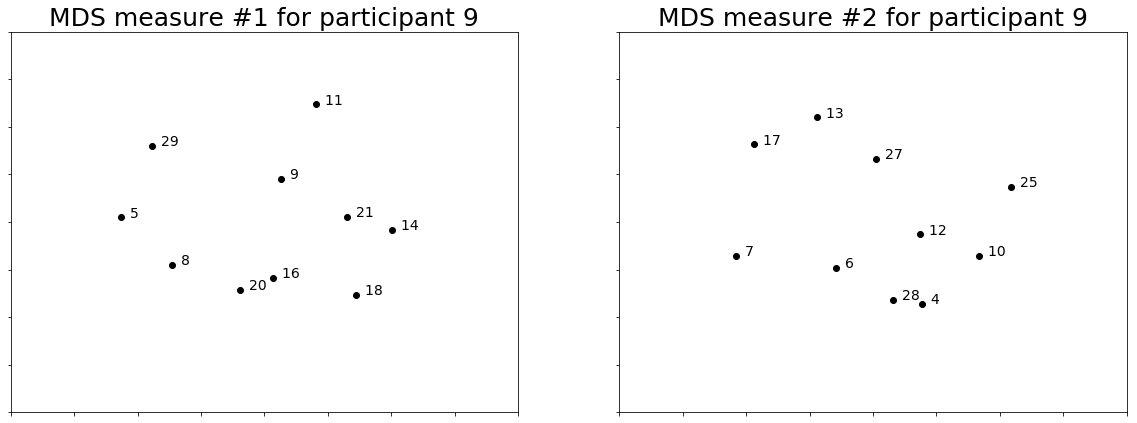

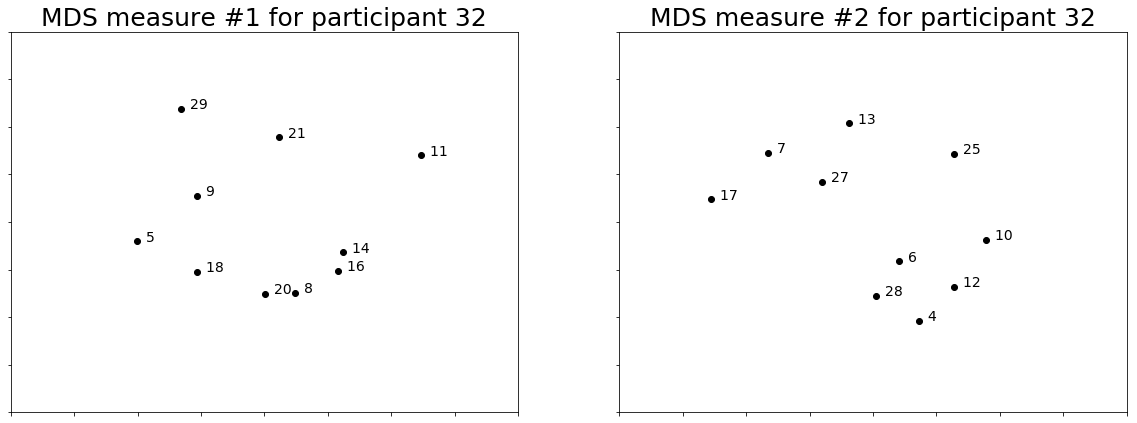

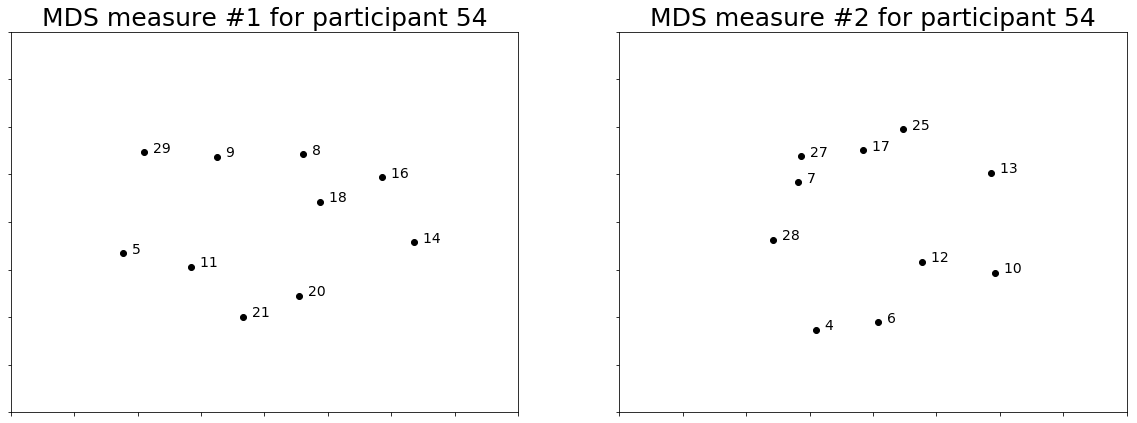

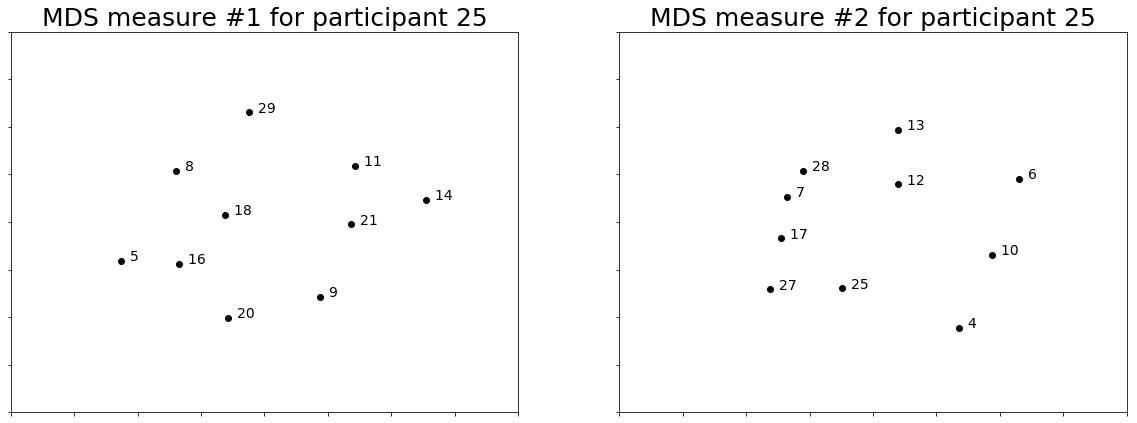

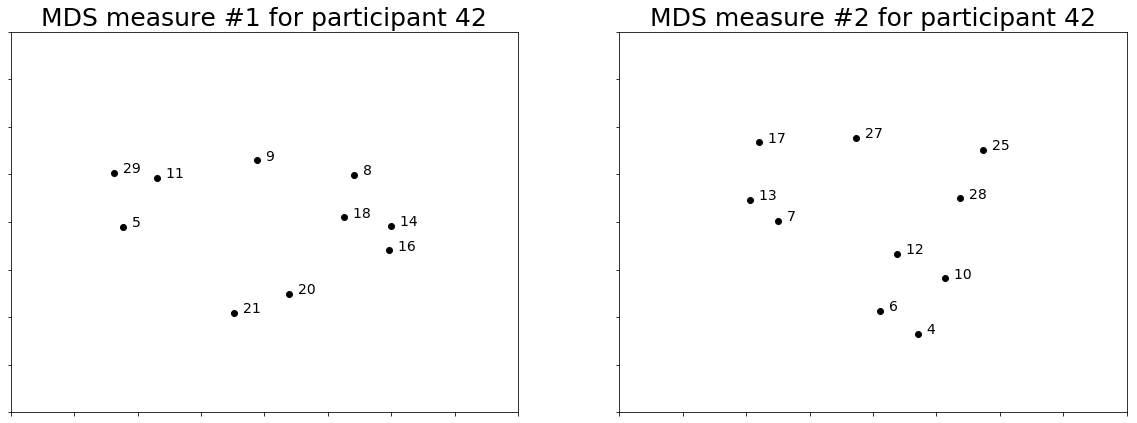

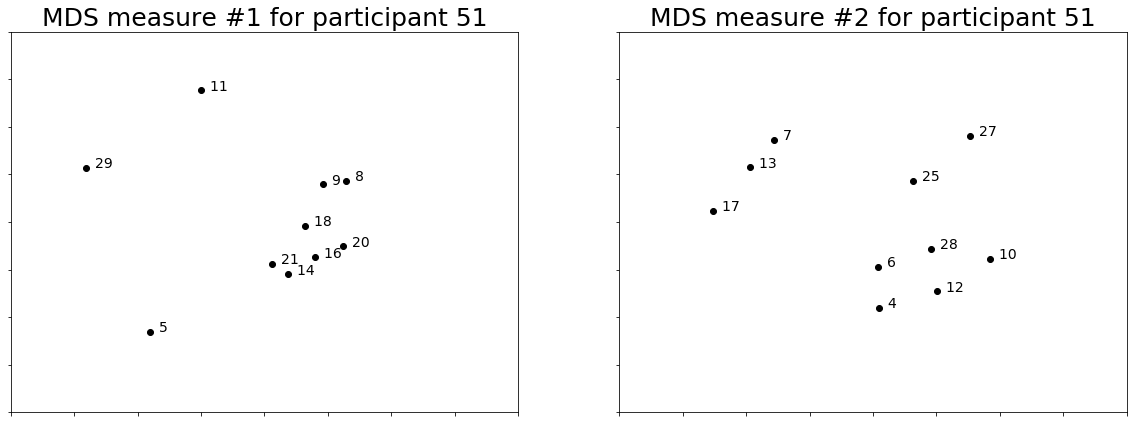

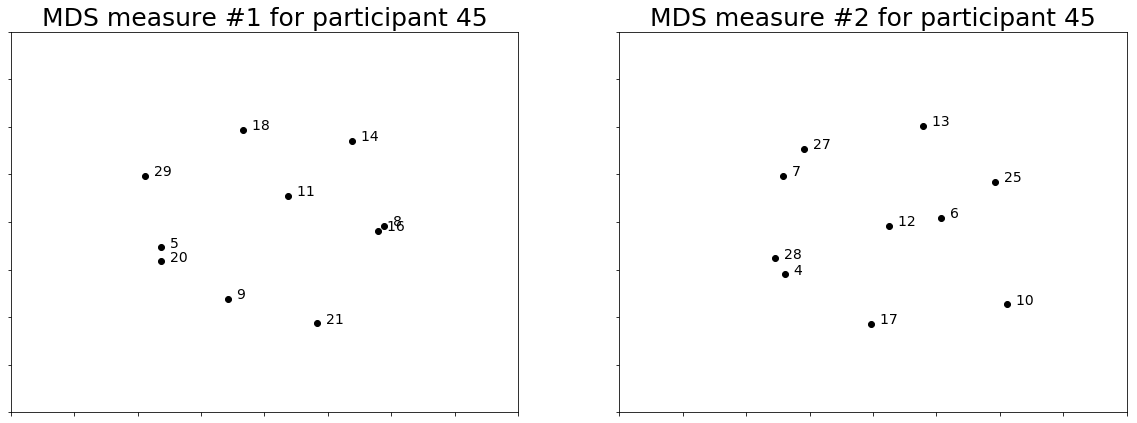

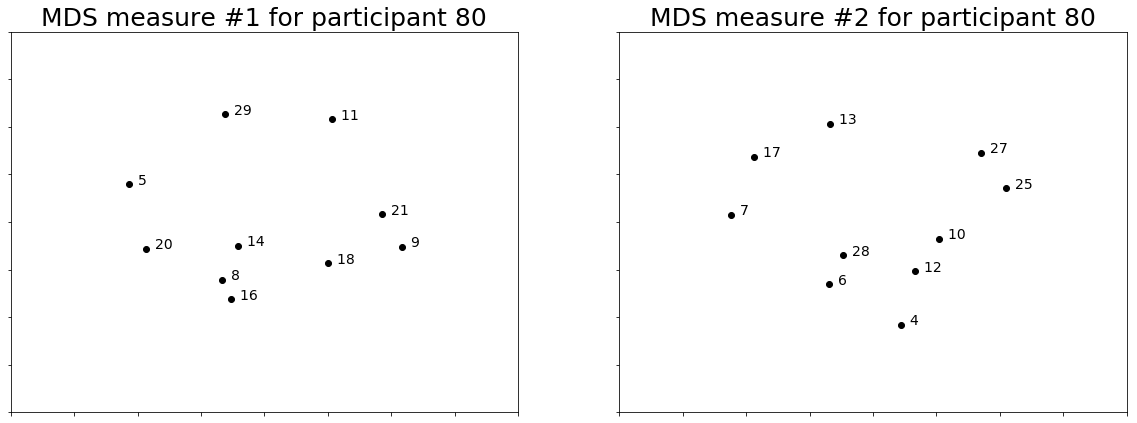

In [30]:
import matplotlib.pyplot as plt
list1 = [5, 14, 16, 9, 29, 8, 11, 20, 18, 21]
list2 = [7, 25, 12, 17, 28, 6, 13, 4, 27, 10]
for i in [3, 10, 4, 8, 31, 53, 24, 41, 50, 44,79]:
    scaled1 = matrix1[i]/100
    f, ((axis1, axis2)) = plt.subplots(1, 2,sharex='col', sharey='row', figsize=(20,7))
    points1 = mds(1 - scaled1)
    axis1.set_xlim(-1, 1)
    axis1.set_ylim(-1, 1)
    axis1.set_xticklabels([]) 
    axis1.plot(points1[:, 0], points1[:, 1], 'ko')
    for name, point in zip(list1, points1):
        axis1.text(point[0], point[1], "  {}".format(name), fontsize=14)
    axis1.set_title("MDS measure #1 for participant " + str(i+1), fontsize=25)
    
    
    
    scaled2 = matrix2[i]/100
    points2 = mds(1 - scaled2)
    axis2.set_xlim(-1, 1)
    axis2.set_ylim(-1, 1)
    axis2.plot(points2[:, 0], points2[:, 1], 'ko')
    axis2.set_yticklabels([]) 
    axis2.set_xticklabels([]) 
    for name, point in zip(list2, points2):
        axis2.text(point[0], point[1], "  {}".format(name), fontsize=14)
    axis2.set_title("MDS measure #2 for participant " + str(i+1), fontsize=25)
    f.savefig('Participant '+ str(i+1) + '.eps')


In [23]:
average = sim_data
average['1_1']
for i in average.columns:
    average[i] = average[i].mean()
average = average.iloc[:-83]
average

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,6_10,7_10,8_10,9_10,10_10,1_20,2_20,3_20,4_20,5_20
2,4.203920e+144,9.003378e+164,5.154946e+157,4.119341e+156,3.478776e+144,3.484948e+155,3.358612e+148,7.684149e+160,5.751568e+157,4.433562e+139,...,9.574747e+160,1.449482e+157,2.185498e+163,4.806278e+161,2.537163e+155,7.397344e+162,4.144822e+149,9.792445e+156,4.774496e+160,3.724266e+153


In [24]:
matrix_ave = np.zeros((10, 10))
sim_ave = average.values
#i: row index of sim_data
#j: column index of sim_data
for j in range(190):
        #s: column name in excel, format: "a_b"
        s = average.columns[j] 
        #a: row of field + 1
        #b: key of sim_map
        a,b = (int(x) for x in s.split('_'))
        #n: first column in field
        #m: second column in field
        n, m = (int(x) for x in sim_map[str(b)].split('/'))
        if (int(field[a-1][n-1]) in fieldmap1.keys()) & (int(field[a-1][m-1]) in fieldmap1.keys()):
                #x: row index of matrix
                x = fieldmap1[field[a-1][n-1]] 
                #y: column index of matrix
                y = fieldmap1[field[a-1][m-1]]
                matrix_ave[x][y] = sim_ave[0][j]

In [20]:
matrix_ave

array([[  0.00000000e+000,   4.20391994e+144,   2.53885493e+142,
          1.80278218e+158,   1.91921740e+135,   3.34839157e+156,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   9.00337843e+164,
          2.63365987e+147,   1.80847108e+151,   5.74924199e+151,
          3.46835406e+159,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          5.15494609e+157,   1.80612514e+148,   8.96774272e+160,
          2.64547003e+155,   2.89721259e+161,   0.00000000e+000,
          0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   4.11934073e+156,   6.56411756e+161,
          2.29004299e+161,   2.16336504e+143,   5.66644650e+159,
          0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+00